In [1]:
# Project Title
#Microgrid Solar PV and EV Charging Optimization Using AI


In [2]:
# Problem Statement

#Solar power generation changes throughout the day, and electric vehicle charging happens at different times. 
#Managing both efficiently in a small power grid (microgrid) is hard. 
#The challenge is to make sure we use as much solar energy as possible while charging EVs and keep energy costs low without overloading the system.


In [3]:
# Proposed Solution

#Create a smart system that predicts how much solar power will be available and how much energy EVs will need to charge. 
#Using these predictions, the system schedules EV charging times to best use solar power, save money, and keep the grid stable.


In [4]:
# Models Used

#- Forecasting: Use AI models like LSTM neural networks to predict solar power output and EV charging needs.

#- Optimization: Use techniques like Reinforcement Learning to find the best charging schedule that saves cost and energy.

#- Detection: Use simple machine learning methods to spot any unusual energy use or problems in the system.


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('data/microgrid/PV_EV_Charging_Dataset.csv')
print(df.columns)
df.head()



Index(['Solar_Power_kW', 'Solar_Irradiance_Wm2', 'Battery_SOC_%',
       'Num_EVs_Charging', 'Charging_Power_kW', 'Charging_Duration_Min',
       'Arrival_Time_Hour', 'Departure_Time_Hour', 'Initial_Battery_SOC_%',
       'Final_Battery_SOC_%', 'Charging_Mode', 'Grid_Energy_Supply_kW',
       'Residential_Load_kW', 'Business_Load_kW', 'Peak_Load_Time_Hour',
       'Energy_Cost_$/kWh', 'Demand_Response', 'Total_Demand_kW',
       'Available_Energy_kW', 'Optimal_Charging_Decision'],
      dtype='object')


,Solar_Power_kW,Solar_Irradiance_Wm2,Battery_SOC_%,Num_EVs_Charging,Charging_Power_kW,Charging_Duration_Min,Arrival_Time_Hour,Departure_Time_Hour,Initial_Battery_SOC_%,Final_Battery_SOC_%,Charging_Mode,Grid_Energy_Supply_kW,Residential_Load_kW,Business_Load_kW,Peak_Load_Time_Hour,Energy_Cost_$/kWh,Demand_Response,Total_Demand_kW,Available_Energy_kW,Optimal_Charging_Decision
0,18.727006,266.619636,33.553512,2,16.648769,68,17,19,10.112083,18.607753,slow,76.890361,25.530005,20.102443,21,0.414037,0,78.929987,16.687381,1
1,47.535715,587.710853,32.228092,8,2.605237,32,6,8,29.825336,43.429754,fast,43.651067,27.868848,24.891186,12,0.217535,1,73.601930,17.584851,1
2,36.599697,885.651252,91.562912,4,19.813568,16,16,17,71.698723,89.021757,fast,66.483719,18.423082,14.326030,18,0.402371,1,112.003383,-8.919967,0
3,29.932924,759.002398,32.459158,7,17.672517,53,17,20,51.555401,56.983965,fast,95.538366,23.194101,20.063959,12,0.253001,1,166.965680,-41.494389,0
4,7.800932,825.905033,34.475475,6,4.324382,62,11,15,52.550398,67.013163,fast,84.945049,8.036619,20.878604,12,0.264464,1,54.861515,37.884466,1


In [7]:
df['timestamp'] = pd.date_range(start='2023-01-01', periods=len(df), freq='15min')
df.set_index('timestamp', inplace=True)
df.head()




,Solar_Power_kW,Solar_Irradiance_Wm2,Battery_SOC_%,Num_EVs_Charging,Charging_Power_kW,Charging_Duration_Min,Arrival_Time_Hour,Departure_Time_Hour,Initial_Battery_SOC_%,Final_Battery_SOC_%,Charging_Mode,Grid_Energy_Supply_kW,Residential_Load_kW,Business_Load_kW,Peak_Load_Time_Hour,Energy_Cost_$/kWh,Demand_Response,Total_Demand_kW,Available_Energy_kW,Optimal_Charging_Decision
timestamp,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,18.727006,266.619636,33.553512,2,16.648769,68,17,19,10.112083,18.607753,slow,76.890361,25.530005,20.102443,21,0.414037,0,78.929987,16.687381,1
2023-01-01 00:15:00,47.535715,587.710853,32.228092,8,2.605237,32,6,8,29.825336,43.429754,fast,43.651067,27.868848,24.891186,12,0.217535,1,73.601930,17.584851,1
2023-01-01 00:30:00,36.599697,885.651252,91.562912,4,19.813568,16,16,17,71.698723,89.021757,fast,66.483719,18.423082,14.326030,18,0.402371,1,112.003383,-8.919967,0
2023-01-01 00:45:00,29.932924,759.002398,32.459158,7,17.672517,53,17,20,51.555401,56.983965,fast,95.538366,23.194101,20.063959,12,0.253001,1,166.965680,-41.494389,0
2023-01-01 01:00:00,7.800932,825.905033,34.475475,6,4.324382,62,11,15,52.550398,67.013163,fast,84.945049,8.036619,20.878604,12,0.264464,1,54.861515,37.884466,1


In [8]:
missing_counts = df.isnull().sum()
print(missing_counts)
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)


Solar_Power_kW               0
Solar_Irradiance_Wm2         0
Battery_SOC_%                0
Num_EVs_Charging             0
Charging_Power_kW            0
Charging_Duration_Min        0
Arrival_Time_Hour            0
Departure_Time_Hour          0
Initial_Battery_SOC_%        0
Final_Battery_SOC_%          0
Charging_Mode                0
Grid_Energy_Supply_kW        0
Residential_Load_kW          0
Business_Load_kW             0
Peak_Load_Time_Hour          0
Energy_Cost_$/kWh            0
Demand_Response              0
Total_Demand_kW              0
Available_Energy_kW          0
Optimal_Charging_Decision    0
dtype: int64
Empty DataFrame
Columns: [Solar_Power_kW, Solar_Irradiance_Wm2, Battery_SOC_%, Num_EVs_Charging, Charging_Power_kW, Charging_Duration_Min, Arrival_Time_Hour, Departure_Time_Hour, Initial_Battery_SOC_%, Final_Battery_SOC_%, Charging_Mode, Grid_Energy_Supply_kW, Residential_Load_kW, Business_Load_kW, Peak_Load_Time_Hour, Energy_Cost_$/kWh, Demand_Response, Total_Dema

In [9]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_15min = df.resample('15min').apply(lambda x: x[numeric_cols].interpolate())
df_15min.head()



,Solar_Power_kW,Solar_Irradiance_Wm2,Battery_SOC_%,Num_EVs_Charging,Charging_Power_kW,Charging_Duration_Min,Arrival_Time_Hour,Departure_Time_Hour,Initial_Battery_SOC_%,Final_Battery_SOC_%,Grid_Energy_Supply_kW,Residential_Load_kW,Business_Load_kW,Peak_Load_Time_Hour,Energy_Cost_$/kWh,Demand_Response,Total_Demand_kW,Available_Energy_kW,Optimal_Charging_Decision
timestamp,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,18.727006,266.619636,33.553512,2,16.648769,68,17,19,10.112083,18.607753,76.890361,25.530005,20.102443,21,0.414037,0,78.929987,16.687381,1
2023-01-01 00:15:00,47.535715,587.710853,32.228092,8,2.605237,32,6,8,29.825336,43.429754,43.651067,27.868848,24.891186,12,0.217535,1,73.601930,17.584851,1
2023-01-01 00:30:00,36.599697,885.651252,91.562912,4,19.813568,16,16,17,71.698723,89.021757,66.483719,18.423082,14.326030,18,0.402371,1,112.003383,-8.919967,0
2023-01-01 00:45:00,29.932924,759.002398,32.459158,7,17.672517,53,17,20,51.555401,56.983965,95.538366,23.194101,20.063959,12,0.253001,1,166.965680,-41.494389,0
2023-01-01 01:00:00,7.800932,825.905033,34.475475,6,4.324382,62,11,15,52.550398,67.013163,84.945049,8.036619,20.878604,12,0.264464,1,54.861515,37.884466,1


In [10]:
features = ['Solar_Power_kW', 'Solar_Irradiance_Wm2', 'Battery_SOC_%',
            'Num_EVs_Charging', 'Charging_Power_kW', 'Charging_Duration_Min',
            'Initial_Battery_SOC_%', 'Final_Battery_SOC_%', 'Grid_Energy_Supply_kW',
            'Residential_Load_kW', 'Business_Load_kW', 'Energy_Cost_$/kWh',
            'Demand_Response', 'Total_Demand_kW', 'Available_Energy_kW',
            'Optimal_Charging_Decision']

scaler = MinMaxScaler()
df_15min[features] = scaler.fit_transform(df_15min[features])
df_15min.head()


,Solar_Power_kW,Solar_Irradiance_Wm2,Battery_SOC_%,Num_EVs_Charging,Charging_Power_kW,Charging_Duration_Min,Arrival_Time_Hour,Departure_Time_Hour,Initial_Battery_SOC_%,Final_Battery_SOC_%,Grid_Energy_Supply_kW,Residential_Load_kW,Business_Load_kW,Peak_Load_Time_Hour,Energy_Cost_$/kWh,Demand_Response,Total_Demand_kW,Available_Energy_kW,Optimal_Charging_Decision
timestamp,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0.371735,0.182609,0.262269,0.222222,0.746908,0.532110,17,19,0.000000,0.034092,0.711434,0.821317,0.251977,21,0.785326,0.0,0.252922,0.742895,1.0
2023-01-01 00:15:00,0.950755,0.540740,0.247509,0.888889,0.076449,0.201835,6,8,0.282140,0.333056,0.295657,0.915000,0.371935,12,0.293850,1.0,0.231242,0.745582,1.0
2023-01-01 00:30:00,0.730954,0.873049,0.908233,0.444444,0.898000,0.055046,16,17,0.881439,0.882181,0.581262,0.536645,0.107278,18,0.756148,1.0,0.387494,0.666215,0.0
2023-01-01 00:45:00,0.596960,0.731791,0.250082,0.777778,0.795783,0.394495,17,20,0.593144,0.496308,0.944695,0.727751,0.251013,12,0.382555,1.0,0.611130,0.568674,0.0
2023-01-01 01:00:00,0.152134,0.806411,0.272535,0.666667,0.158524,0.477064,11,15,0.607385,0.617102,0.812187,0.120610,0.271420,12,0.411227,1.0,0.154989,0.806368,1.0


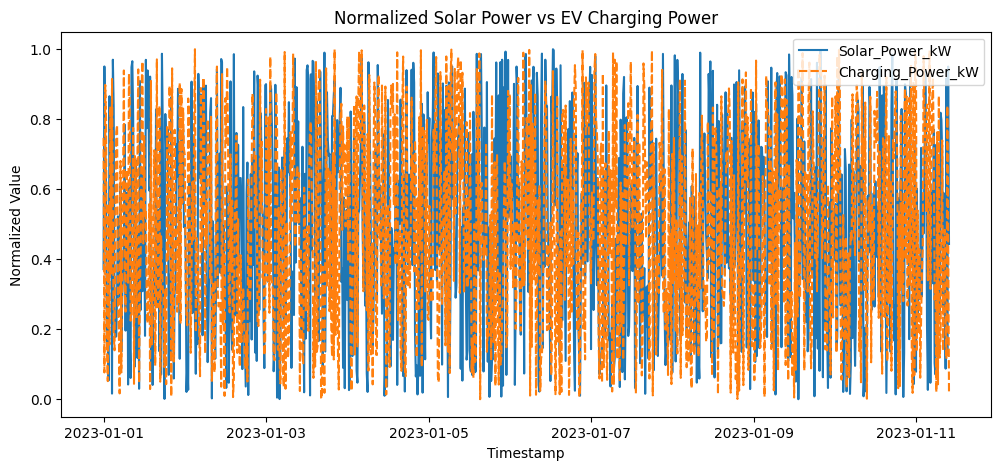

In [11]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_15min[['Solar_Power_kW', 'Charging_Power_kW']])
plt.title('Normalized Solar Power vs EV Charging Power')
plt.xlabel('Timestamp')
plt.ylabel('Normalized Value')
plt.show()


In [12]:
df_15min.to_csv('data/microgrid/processed_microgrid.csv')


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-01 00:00:00 to 2023-01-11 09:45:00
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Solar_Power_kW             1000 non-null   float64
 1   Solar_Irradiance_Wm2       1000 non-null   float64
 2   Battery_SOC_%              1000 non-null   float64
 3   Num_EVs_Charging           1000 non-null   int64  
 4   Charging_Power_kW          1000 non-null   float64
 5   Charging_Duration_Min      1000 non-null   int64  
 6   Arrival_Time_Hour          1000 non-null   int64  
 7   Departure_Time_Hour        1000 non-null   int64  
 8   Initial_Battery_SOC_%      1000 non-null   float64
 9   Final_Battery_SOC_%        1000 non-null   float64
 10  Charging_Mode              1000 non-null   object 
 11  Grid_Energy_Supply_kW      1000 non-null   float64
 12  Residential_Load_kW        1000 non-null   float64
 13  Business_Loa

In [16]:
!pip install tensorflow


from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
    --------------------------------------- 4.7/332.0 MB 23.1 MB/s eta 0:00:15
   - -------------------------------------- 9.2/332.0 MB 22.5 MB/s eta 0:00:15
   - -------------------------------------- 13.9/332.0 MB 22.3 MB/s eta 0:00:15
   -- ------------------------------------- 18.4/332.0 MB 22.1 MB/s eta 0:00:15
   -- ------------------------------------- 22.8/332.0 MB 22.2 MB/s eta 0:00:14
   --- ------------------------------------ 27.5/332.0 MB 22.1 MB/s eta 0:00:14
   --- ------------------------------------ 32.0/332.0 MB 22.0 MB/s eta 0:00:14
   ---- ----------------------------------- 36.7/332.0 MB 22.0 MB/s eta 0:00:14
   ---- ----------------------------------- 41.4/332.0 MB 22.0 MB/s eta 0:00:14
   ----- ---------------------------------- 45.9/332.0 MB 22.0 MB/s eta 0:00:14
   ------ --------------------------------- 50.6/332.0 MB 22.0 MB/s eta 0:00:13
   ------ --------------------------------- 55.3/33

In [17]:
def create_sequences(data, input_steps, output_steps, target_column):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps + 1):
        X.append(data.iloc[i: i + input_steps].values)
        y.append(data.iloc[i + input_steps: i + input_steps + output_steps][target_column].values)
    return np.array(X), np.array(y)


In [18]:
features = ['Solar_Power_kW', 'Solar_Irradiance_Wm2', 'Battery_SOC_%', 'Num_EVs_Charging',
            'Charging_Power_kW', 'Charging_Duration_Min', 'Grid_Energy_Supply_kW',
            'Residential_Load_kW', 'Business_Load_kW', 'Energy_Cost_$/kWh', 'Demand_Response']
target = 'Charging_Power_kW'

input_steps = 12
output_steps = 4

X, y = create_sequences(df_15min[features], input_steps, output_steps, target)
print('Input shape:', X.shape)
print('Output shape:', y.shape)


Input shape: (985, 12, 11)
Output shape: (985, 4)


In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print('Train shape:', X_train.shape, y_train.shape)
print('Validation shape:', X_valid.shape, y_valid.shape)
print('Test shape:', X_test.shape, y_test.shape)



Train shape: (689, 12, 11) (689, 4)
Validation shape: (148, 12, 11) (148, 4)
Test shape: (148, 12, 11) (148, 4)


In [22]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, activation='relu'))
model.add(Dense(output_steps))
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,716 (77.02 KB)

 Trainable params: 19,716 (77.02 KB)

 Non-trainable params: 0 (0.00 B)